In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("K:\ML-Projects\Kodein\data2_train.csv")
df

,Feature_1,Feature_2,Target
0,8.160646,88.799326,0
1,31.149536,102.335826,0
2,13.103383,92.902908,0
3,15.950445,77.412565,0
4,35.856965,94.441550,0
...,...,...,...
795,35.142860,19.722994,1
796,38.306612,36.989602,1
797,28.649138,30.474118,1
798,31.949594,23.900828,1


In [3]:
df.isnull().sum()

Feature_1    0
Feature_2    0
Target       0
dtype: int64

In [4]:
df.Target.unique()

array([0, 1], dtype=int64)

In [5]:
df.shape


(800, 3)

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

x= df.drop("Target",axis=1)
y=df.Target

scaler1 =StandardScaler()
scaler2 =MinMaxScaler()
x_scaled_1 = scaler1.fit_transform(x)
x_scaled_2=scaler2.fit_transform(x)



In [7]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x_scaled_1,y,test_size=0.2,random_state=42)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_scaled_2,y,test_size=0.2,random_state=42)

In [8]:
model1 = LogisticRegression()
model1.fit(x_train_2,y_train_2)


pred= model1.predict(x_test_2)
score =accuracy_score(pred,y_test_2)

In [9]:
score

0.99375

In [12]:
df2 = pd.read_csv("K:\ML-Projects\Kodein\data2_test.csv")

df2

,Feature_1,Feature_2,Target
0,48.489576,81.609641,0
1,26.069706,89.783100,0
2,31.967447,88.005024,0
3,44.957613,91.219129,0
4,27.681870,87.381969,0
...,...,...,...
195,41.109517,44.902902,1
196,52.749410,36.919400,1
197,26.368150,43.111313,1
198,29.879813,24.719104,1


In [13]:
df2.shape

(200, 3)

In [14]:
df2_x= df.drop("Target",axis=1)
df2_y=df.Target

In [15]:
df2_x_scaled=scaler2.fit_transform(df2_x)

pred2=model1.predict(df2_x_scaled)
score2=accuracy_score(pred2,df2_y)

In [16]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
score2

0.99

Neural Network


In [61]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model2 = Sequential([
  Dense(units=25, activation='relu', input_shape=(x_scaled_1.shape[1],)),
  Dense(units=16, activation='relu'),
  Dense(units=1)
  ])

model2.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

model2.fit(x_scaled_2,y,epochs=100)

        



Epoch 1/100


c:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.5367 - loss: 0.6922 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.4910 - loss: 0.6562
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5331 - loss: 0.6211
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.5319 - loss: 0.5782
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.5800 - loss: 0.5283
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6838 - loss: 0.4811
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.8027 - loss: 0.4127
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8690 - loss: 0.3574
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.9095 - loss: 0.3035
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.9346 - loss: 0.2512
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9462 - loss: 0.2155
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/ste

In [62]:
pred3 = model2.predict(df2_x_scaled)  
pred3_categorical = (pred3 > 0.5).astype(int).flatten() 
score3 = accuracy_score(pred3_categorical, df2_y) 


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


In [50]:
pred3_categorical

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
score3

0.98875

KNN algorithm : 
K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification and regression

In [75]:
from  sklearn.neighbors import KNeighborsClassifier

model3= KNeighborsClassifier(n_neighbors=10)

model3.fit(x_scaled_2,y)





KNeighborsClassifier(n_neighbors=10)

In [69]:
y_train_1.shape

(640,)

In [76]:
pred4 = model3.predict(df2_x_scaled) 

score4 = accuracy_score(pred4, df2_y) 

In [77]:
score4

0.9875

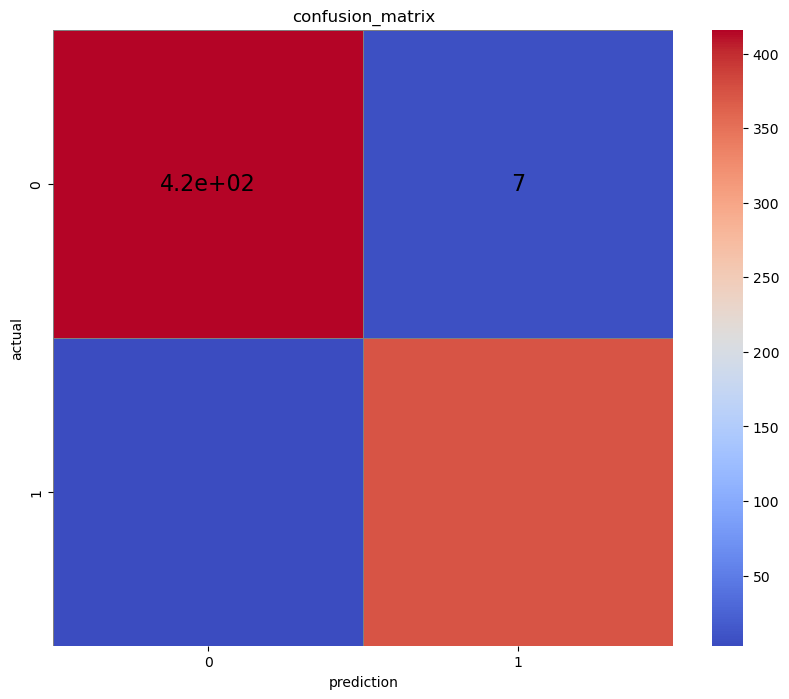

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix =confusion_matrix(pred4,df2_y)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', xticklabels=np.unique(df2_y), yticklabels=np.unique(df2_y),annot_kws={"size": 16,"color":"black"},linewidths=.5, linecolor='gray'
)
plt.xlabel("prediction")
plt.ylabel("actual")
plt.title("confusion_matrix")
plt.show()


In [79]:
matrix

array([[416,   7],
       [  3, 374]], dtype=int64)